<a href="https://colab.research.google.com/github/uyeonH/HelloEngineering/blob/master/Mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 경로 설정

In [0]:
#드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%pwd
!ls
%cd drive/My\ Drive/opencv_youtube

drive  sample_data
/content/drive/.shortcut-targets-by-id/1LMhwVokU2atmLJwlgzWIqkCZ8Spv0AzH/opencv_youtube


## 모듈 불러오기

In [0]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2

In [0]:
ls

cascade_files/  face1.jpeg  mask1.JPG  Mask.ipynb
cat.jpeg        face1.jpg   mask2.JPG  mask_pororo.png


## 얼굴, 가면 이미지 가져오기


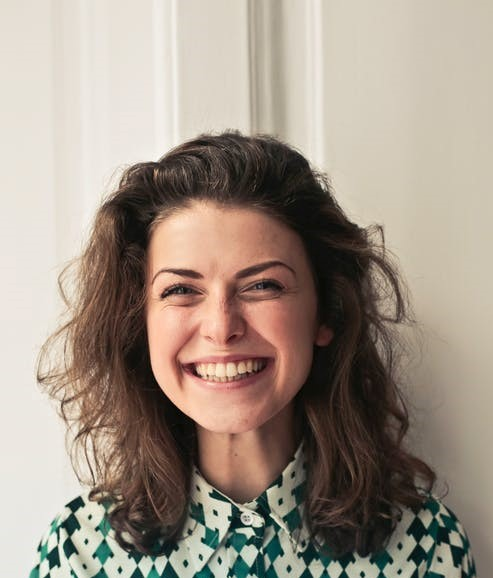

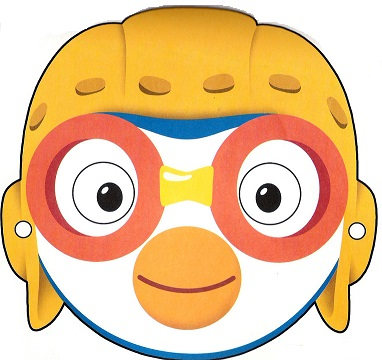

In [0]:
# face 분류기 로드
face_cascade = cv2.CascadeClassifier('cascade_files/haarcascade_frontalface_alt.xml')

#얼굴 영상
img=cv2.imread('face1.jpg')
cv2_imshow(img)

# 가면 영상
face_mask = cv2.imread('mask_pororo.png')
cv2_imshow(face_mask)

#cv2_imshow(face_mask)
h_mask, w_mask = face_mask.shape[:2]



In [0]:
face_mask.shape

(360, 382, 3)

In [0]:
face_cascade.empty()

False

## 얼굴 검출 확인하기


In [0]:

if face_cascade.empty():
    raise IOError('Unable to load the face cascade classifier xml file')
    print("얼굴을 찾을 수 없음")



## 이미지 크기 조절


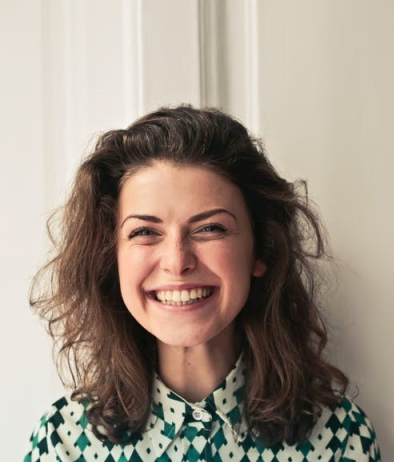

In [0]:
scaling_factor = 0.8
img = cv2.resize(img, None, fx=scaling_factor, fy=scaling_factor, interpolation=cv2.INTER_AREA)
cv2_imshow(img)

## GrayScale로 변환 (흑백)

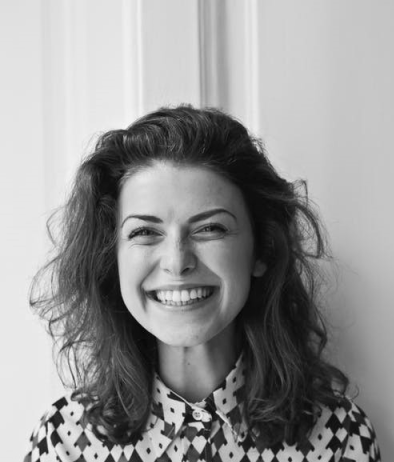

In [0]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

## 마스크 합성하기

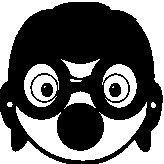

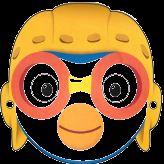

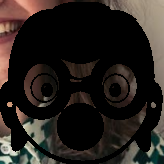

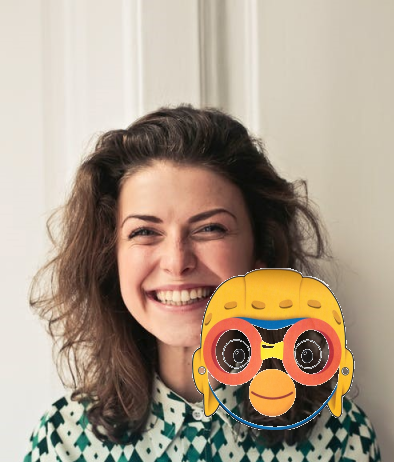

In [0]:
face_rects = face_cascade.detectMultiScale(gray, 1.3, 5)
   
for (x, y, w, h) in face_rects:
  img_roi = img[y:y + h, x:x + w]

  if h > 0 and w > 0:
    x = int(x+w*0.6 )
    y = int(y +h*0.6)
    w = int(1* w)
    h = int(1 * h)
          
  img_roi = img[y:y + h, x:x + w]
          
  face_mask_small = cv2.resize(face_mask, (w, h), interpolation=cv2.INTER_AREA)      
  gray_mask = cv2.cvtColor(face_mask_small, cv2.COLOR_BGR2GRAY)
  ret, mask = cv2.threshold(gray_mask, 240, 255, cv2.THRESH_BINARY_INV)
  
  #cv2_imshow(face_mask_small)
  #cv2_imshow(gray_mask)
  #cv2_imshow(mask)
  
  mask_inv = cv2.bitwise_not(mask)
  masked_face = cv2.bitwise_and(face_mask_small, face_mask_small, mask=mask)
  masked_frame = cv2.bitwise_and(img_roi, img_roi, mask=mask_inv)
  
  cv2_imshow(mask_inv)      
  cv2_imshow(masked_face)
  cv2_imshow(masked_frame)
        
  img[y:y + h, x:x + w] = cv2.add(masked_face, masked_frame)

cv2_imshow(img)   